In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df_detections = pd.read_csv('detections_SNe_v7.0.1.csv', index_col = 0)
df_matches = pd.read_csv('dfcrossmatches_prioritized_v7.0.1.csv')

In [3]:
df_detections.head()

,objectId,fid,isdiffpos,sigmapsf,field,fwhm,dec,magpsf,rcid,ra,...,sgscore3,neargaia,sgscore1,mjd,corrected,magpsf_corr,sigmapsf_corr,sigmapsf_corr_ext,dubious,has_stamp
0,ZTF18aahvndq,1,1.0,0.028791,626,3.59,27.008621,15.385100,34,198.722678,...,0.5,78.019280,0.175976,58991.302095,False,NaN,NaN,NaN,False,True
1,ZTF18aahvndq,1,1.0,0.031231,626,2.57,27.008635,15.712121,34,198.722679,...,0.5,78.022800,0.175976,59000.260914,False,NaN,NaN,NaN,False,True
2,ZTF18aahvndq,1,1.0,0.032161,626,1.98,27.008647,16.072975,34,198.722653,...,0.5,78.111310,0.175976,59004.192674,False,NaN,NaN,NaN,False,True
3,ZTF18aahvndq,1,1.0,0.049931,626,2.75,27.008624,17.708502,34,198.722660,...,0.5,78.077545,0.175976,59021.227604,False,NaN,NaN,NaN,False,True
4,ZTF18aahvndq,1,1.0,0.028520,626,3.13,27.008636,15.617474,34,198.722660,...,0.5,78.083150,0.175976,58986.223646,False,NaN,NaN,NaN,False,True


In [4]:
len(df_detections['objectId'].unique())

2068

In [5]:
df_matches

,oid,classALeRCE,ra,dec,period,source,id_source,class_source,separation_arcsec
0,ZTF19abegncu,AGN,357.296363,-8.941186,NaN,Oh2015,5.8772718059579e+17,AGN_galaxy_dominated,0.243081
1,ZTF18acejdhu,AGN,11.958444,-10.496615,NaN,Oh2015,5.877272256953059e+17,AGN_galaxy_dominated,0.301126
2,ZTF18acdzene,AGN,17.478620,-10.110250,NaN,Oh2015,5.877271789938934e+17,AGN_galaxy_dominated,0.158643
3,ZTF18abwzuzw,AGN,25.038255,-10.352430,NaN,Oh2015,5.877272294485526e+17,AGN_galaxy_dominated,0.485322
4,ZTF19abmposz,AGN,26.670031,-8.354787,NaN,Oh2015,5.877271806085038e+17,AGN_galaxy_dominated,0.213990
...,...,...,...,...,...,...,...,...,...
173874,ZTF18abikbvc,LPV,286.720222,24.733440,NaN,GAIADR2VS,4.533629080944307e+18,MIRA_SR,0.299487
173875,ZTF19aamtoyb,LPV,99.257590,-15.567786,NaN,GAIADR2VS,2.9501070744892713e+18,MIRA_SR,0.299597
173876,ZTF19abeesgk,LPV,277.499222,-27.002742,NaN,GAIADR2VS,4.0518162825206625e+18,MIRA_SR,0.299766
173877,ZTF18abnubuy,LPV,292.053754,38.418277,NaN,GAIADR2VS,2.0526959231045647e+18,MIRA_SR,0.299777


In [6]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173879 entries, 0 to 173878
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   oid                173879 non-null  object 
 1   classALeRCE        173879 non-null  object 
 2   ra                 173879 non-null  float64
 3   dec                173879 non-null  float64
 4   period             92683 non-null   object 
 5   source             173879 non-null  object 
 6   id_source          173879 non-null  object 
 7   class_source       173879 non-null  object 
 8   separation_arcsec  173879 non-null  float64
dtypes: float64(3), object(6)
memory usage: 11.9+ MB


In [7]:
df_detections.columns

Index(['objectId', 'fid', 'isdiffpos', 'sigmapsf', 'field', 'fwhm', 'dec',
       'magpsf', 'rcid', 'ra', 'sky', 'rb', 'ssmagnr', 'distpsnr3', 'sgscore2',
       'maggaiabright', 'distpsnr2', 'distpsnr1', 'maggaia', 'exptime', 'drb',
       'sgscore3', 'neargaia', 'sgscore1', 'mjd', 'corrected', 'magpsf_corr',
       'sigmapsf_corr', 'sigmapsf_corr_ext', 'dubious', 'has_stamp'],
      dtype='object')

In [8]:
'rb', 'error', 'magpsf', 'band', 'sigmapsf', 'time', 'ra', 'magnitude', 'dec', 'isdiffpos'

('rb',
 'error',
 'magpsf',
 'band',
 'sigmapsf',
 'time',
 'ra',
 'magnitude',
 'dec',
 'isdiffpos')

**Solo atributos relevantes por dataset**

In [9]:
df_detections = df_detections[['objectId', 'fid', 'magpsf', 'sigmapsf', 'magpsf_corr', 'sigmapsf_corr', 'mjd', 'isdiffpos', 'rb', 'ra', 'dec', 'sgscore1']]
df_detections.columns = ['oid', 'fid', 'magpsf', 'sigmapsf', 'magpsf_corr', 'sigmapsf_corr', 'mjd', 'isdiffpos', 'rb', 'ra', 'dec', 'sgscore1']

In [10]:
df_detections.head(2)

,oid,fid,magpsf,sigmapsf,magpsf_corr,sigmapsf_corr,mjd,isdiffpos,rb,ra,dec,sgscore1
0,ZTF18aahvndq,1,15.385100,0.028791,NaN,NaN,58991.302095,1.0,0.770000,198.722678,27.008621,0.175976
1,ZTF18aahvndq,1,15.712121,0.031231,NaN,NaN,59000.260914,1.0,0.894286,198.722679,27.008635,0.175976


In [11]:
df_matches = df_matches[['oid', 'classALeRCE']]

In [12]:
df_matches.head(2)

,oid,classALeRCE
0,ZTF19abegncu,AGN
1,ZTF18acejdhu,AGN


**Juntar datasets**

In [13]:
df_novas =  pd.merge(df_detections, df_matches, left_on='oid', right_on='oid')

In [14]:
df_novas.head(2)

,oid,fid,magpsf,sigmapsf,magpsf_corr,sigmapsf_corr,mjd,isdiffpos,rb,ra,dec,sgscore1,classALeRCE
0,ZTF18aahvndq,1,15.385100,0.028791,NaN,NaN,58991.302095,1.0,0.770000,198.722678,27.008621,0.175976,SNIa
1,ZTF18aahvndq,1,15.712121,0.031231,NaN,NaN,59000.260914,1.0,0.894286,198.722679,27.008635,0.175976,SNIa


**Clases detectadas**

In [15]:
df_novas[['classALeRCE', 'oid']].drop_duplicates('oid').groupby('classALeRCE').count()

,oid
classALeRCE,
SLSN,34
SNII,330
SNIIb,16
SNIIn,42
SNIa,1540
SNIbc,106


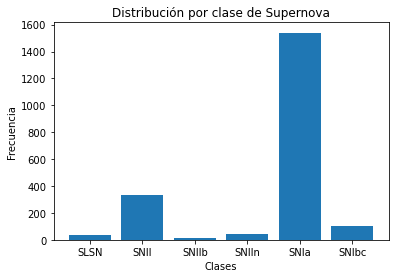

In [16]:
values = df_novas[['classALeRCE', 'oid']].drop_duplicates('oid').groupby('classALeRCE').count().index.values.tolist()
frequencies = df_novas[['classALeRCE', 'oid']].drop_duplicates('oid').groupby('classALeRCE').count()['oid'].tolist()
plt.bar(values, frequencies)
plt.title('Distribución por clase de Supernova')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.savefig(f'hist_1.pdf', bbox_inches='tight')
plt.show()

**Se juntan las clases SNII - SNIIb - SNIIn en SNII**

In [17]:
df_novas = df_novas.replace('SNIIb', 'SNII')
df_novas = df_novas.replace('SNIIn', 'SNII')

In [18]:
df_novas[['classALeRCE', 'oid']].drop_duplicates('oid').groupby('classALeRCE').count()

,oid
classALeRCE,
SLSN,34
SNII,388
SNIa,1540
SNIbc,106


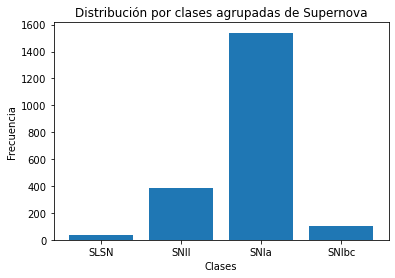

In [19]:
values = df_novas[['classALeRCE', 'oid']].drop_duplicates('oid').groupby('classALeRCE').count().index.values.tolist()
frequencies = df_novas[['classALeRCE', 'oid']].drop_duplicates('oid').groupby('classALeRCE').count()['oid'].tolist()
plt.bar(values, frequencies)
plt.title('Distribución por clases agrupadas de Supernova')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.savefig(f'hist_2.pdf', bbox_inches='tight')
plt.show()

**Reemplazar magpsf_corr y sigmapsf_corr por sus no corr en caso de NaN**

In [20]:
df_novas['magpsf_corr'] = df_novas['magpsf_corr'].fillna(df_novas['magpsf'])
df_novas['sigmapsf_corr'] = df_novas['sigmapsf_corr'].fillna(df_novas['sigmapsf'])

In [21]:
df_novas.head(2)

,oid,fid,magpsf,sigmapsf,magpsf_corr,sigmapsf_corr,mjd,isdiffpos,rb,ra,dec,sgscore1,classALeRCE
0,ZTF18aahvndq,1,15.385100,0.028791,15.385100,0.028791,58991.302095,1.0,0.770000,198.722678,27.008621,0.175976,SNIa
1,ZTF18aahvndq,1,15.712121,0.031231,15.712121,0.031231,59000.260914,1.0,0.894286,198.722679,27.008635,0.175976,SNIa


**Exportar datos**

In [22]:
df_novas.to_pickle('df_novas.pkl')

**Plot de cada clase**

In [23]:
classes = []
max_val = []

for i in df_novas['classALeRCE'].unique().tolist():
    classes.append(i)
    max_val.append(df_novas[df_novas['classALeRCE'] == f'{i}'].groupby('oid').count().idxmax()[0])
    print(i, df_novas[df_novas['classALeRCE'] == f'{i}'].groupby('oid').count().idxmax()[0])

SNIa ZTF19abqanpy
SNIbc ZTF18acwvcbz
SNII ZTF18acbwaxk
SLSN ZTF19abclykm


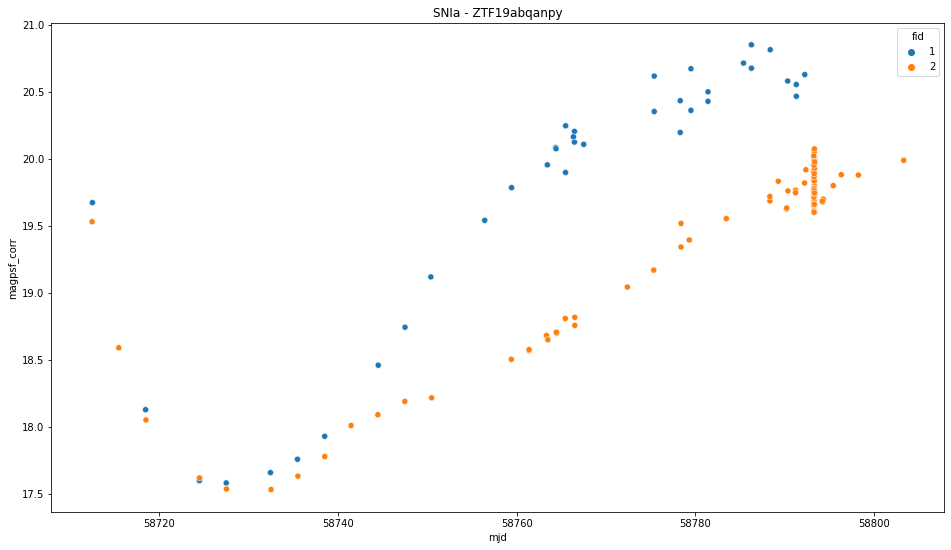

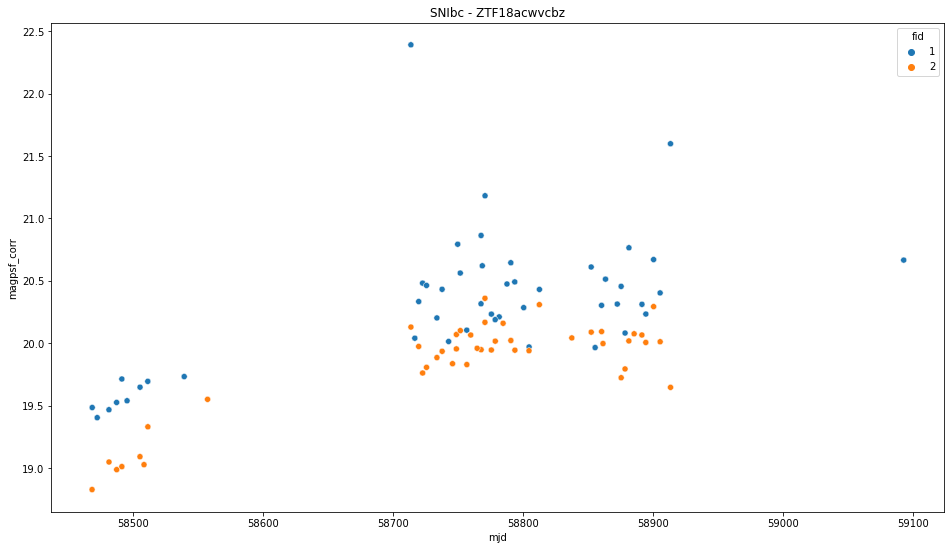

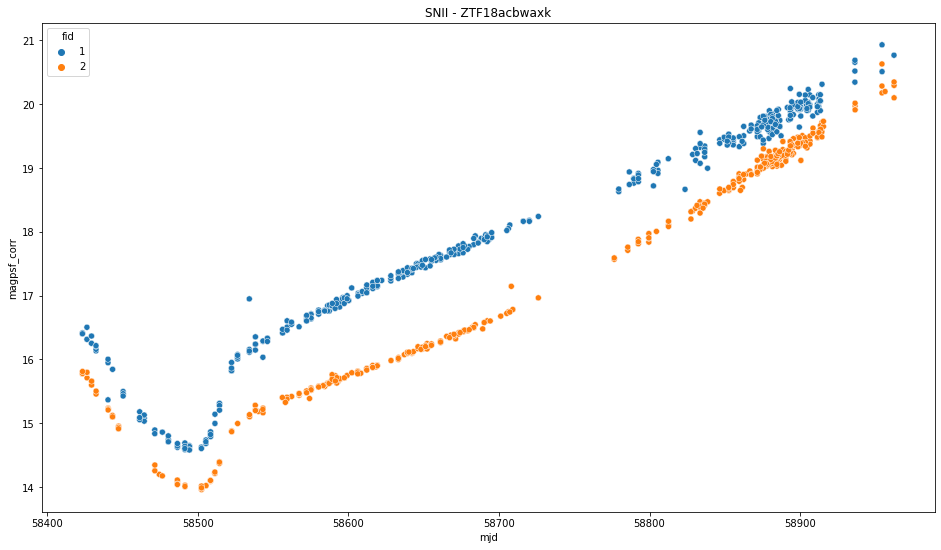

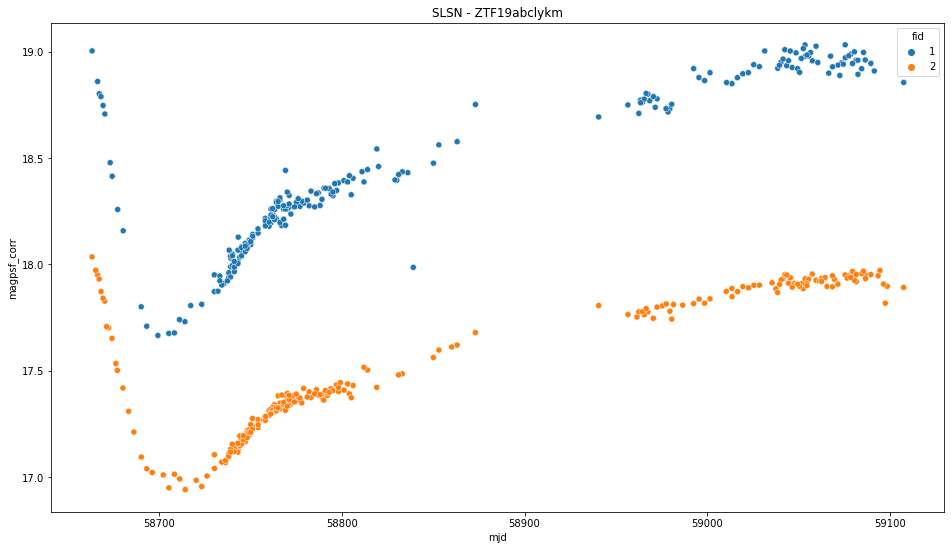

In [24]:
for i in range(len(classes)):
    
    plt.figure(figsize=(16,9))
    plt.title(f'{classes[i]} - {max_val[i]}')
    plot = sns.scatterplot(data = df_novas[df_novas['oid'] == max_val[i]], hue = df_novas[df_novas['oid'] ==  max_val[i]]['fid'], x = "mjd", y = "magpsf_corr", palette = 'tab10')
    fig = plot.get_figure()
    fig.savefig(f'{classes[i]}.pdf', bbox_inches='tight')